# A notebook to pracitice Data Cleaning

Please not I was not completing the data cleaning project, but showing samples of my work.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the code that will provide a basic idea of the data and how to approach cleaning the data
%run BasicDataExploration.ipynb

Load the Data

In [3]:
dataFrame = pd.read_csv('Uncleaned_DS_jobs.csv', index_col=0 )
dataFrame.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
index,,,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst\r\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1


In [4]:
# Get Information needed to Clean the Table

In [5]:
# Show an overall view of the data.  Missing Values only show empty cells.  It does not show if the user uses -1, "" for missing values.
column_info = info_about_columns(dataFrame, data_science_descriptions=None)
column_info

,DataType,# of Categories,categories/sample ratio,missing values,missing values %
Job Title,object,172,26.0,0,0.0
Salary Estimate,object,30,4.0,0,0.0
Job Description,object,489,73.0,0,0.0
Rating,float64,32,5.0,0,0.0
Company Name,object,432,64.0,0,0.0
Location,object,207,31.0,0,0.0
Headquarters,object,229,34.0,0,0.0
Size,object,9,1.0,0,0.0
Founded,int64,103,15.0,0,0.0
Type of ownership,object,13,2.0,0,0.0


In [6]:
# Show examples of the data contained in each cell. I am seeing a lot of -1 which means missing values
pd.set_option('display.max_colwidth', 10000)
show_examples_of_data(dataFrame, data_information=column_info,category_cutoff=30)

Field   
0           Job Title  \
1     Salary Estimate   
2     Job Description   
3              Rating   
4        Company Name   
5            Location   
6        Headquarters   
7                Size   
8             Founded   
9   Type of ownership   
10           Industry   
11             Sector   
12            Revenue   
13        Competitors   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [7]:
# When doing data  cleaning the advice I was given was to drop the rows for machine learning, but there are some other alternatives
# 1. Try to find a trused resource to fill in the information
# 2 Add a constant value or take the average or mean values of the values -- Dangerous since it could skew the results in the wrong way.
# 3 Interopolate -- Only good for time based datasets or if there is a pattern in the data

# Getting the missing values of some of the rows.
missing_rating = (dataFrame["Rating"].value_counts())[-1]
missing_headquarters = dataFrame["Headquarters"].str.contains("-1").sum()
missing_company_name = dataFrame["Company Name"].str.contains("-1").sum()
missing_industry = dataFrame["Industry"].str.contains("-1").sum()

missing_values = missing_company_name + missing_headquarters + missing_rating + missing_industry
print("The number of rows ( rough estimate -- a row could have two values and I did not do a complete count ) -- ", missing_values)


The number of rows ( rough estimate -- a row could have two values and I did not do a complete count ) --  153


In [8]:
# The Job Title should have been split into three columns ( Job Title, Level ( Senior, Mid, Junior) and Classifiaiton Level.
# I could  use dictionary and split the data, but it might be better something such as Chat GPTand using the Job Title and 
# query Chaat GPT

In [9]:
# Convert the Salary Esimate to two columns -- One for the low range and one for high range
strings = dataFrame["Salary Estimate"].copy(deep=True).str.findall(r'\d+')
min_salary = strings.apply( lambda x: x[0]).astype("int")
max_salary = strings.apply( lambda x: x[1]).astype("int")

dataFrame["min_salary"] = min_salary
dataFrame["max_salary"] = max_salary
dataFrame.drop("Salary Estimate", axis=1, inplace=True)


In [10]:
# Converting Size to a Categorical varibles since it has a few unique entries
# Assumption -1 is unknonwn since the general fromat is number1 to number2
# t.astype("category") will produce a column of numbers instead of string which is good for machine learning.
new_column = dataFrame["Size"].copy(deep=True).str.replace("-1", "Unknown").astype("category")
dataFrame["Size"]= new_column


In [11]:
# Convert the Location into two columns Location City and Location State
data = dataFrame["Location"].str.replace("-1","Unknown, Unknown").str.findall(r'(.*), (\w+)')

location_cities = []
location_states = []
for item in data:
    location_cities.append("Unknown" if len(item) == 0 else item[0][0])
    location_states.append("Unknown" if len(item) == 0 else item[0][1])
    
dataFrame["Location City"] = location_cities
dataFrame["Location State"] = location_states
dataFrame.drop('Location', axis=1, inplace=True)
dataFrame[["Location City", "Location State"]] = dataFrame[["Location City", "Location State"]].astype("string")

In [12]:
# Convert the Headquaters into Headquarters City and Headquarters State
data = dataFrame["Headquarters"].str.replace("-1","Unknown, Unknown").str.findall(r'(.*), (\w+)')

headquarters_cities = []
headquarters_states = []
for item in data:
    headquarters_cities.append("Unknown" if len(item) == 0 else item[0][0])
    headquarters_states.append("Unknown" if len(item) == 0 else item[0][1])
    
dataFrame["Headquarter City"] = headquarters_cities
dataFrame["Headquarter State"] = headquarters_states
dataFrame.drop('Headquarters', axis=1, inplace=True)
dataFrame[["Headquarter City", "Headquarter State"]] = dataFrame[["Location City", "Location State"]].astype("string")



In [13]:
# Convert Rating to an ordered category
bins = [ -1.1, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0 ]
labels = ["Unknown", "Very Poor", "Poor", "Average", "Good", "Excellent" ]
dataFrame['Rating'] = pd.cut( dataFrame.Rating, bins=bins, labels=labels)
dataFrame['Rating'].astype("category")

index
0           Good
1      Excellent
2           Good
3           Good
4        Average
         ...    
667         Good
668      Unknown
669      Unknown
670    Excellent
671      Average
Name: Rating, Length: 672, dtype: category
Categories (6, object): ['Unknown' < 'Very Poor' < 'Poor' < 'Average' < 'Good' < 'Excellent']

In [14]:
# Convert Industry to a category
new_column = dataFrame["Industry"].copy(deep=True).str.replace("-1", "Unknown").astype("category")
dataFrame["Industry"] = new_column

In [15]:
# Sanity check to make sure the changes were applied.
column_info = info_about_columns(dataFrame, data_science_descriptions=None)
column_info

,DataType,# of Categories,categories/sample ratio,missing values,missing values %
Job Title,object,172,26.0,0,0.0
Job Description,object,489,73.0,0,0.0
Rating,category,5,1.0,0,0.0
Company Name,object,432,64.0,0,0.0
Size,category,8,1.0,0,0.0
Founded,int64,103,15.0,0,0.0
Type of ownership,object,13,2.0,0,0.0
Industry,category,58,9.0,0,0.0
Sector,object,23,3.0,0,0.0
Revenue,object,14,2.0,0,0.0


In [16]:
# Divide the Table by DataTypes
dataFrame.dtypes

Job Title                    object
Job Description              object
Rating                     category
Company Name                 object
Size                       category
Founded                       int64
Type of ownership            object
Industry                   category
Sector                       object
Revenue                      object
Competitors                  object
min_salary                    int64
max_salary                    int64
Location City        string[python]
Location State       string[python]
Headquarter City     string[python]
Headquarter State    string[python]
dtype: object

In [17]:
categories = dataFrame.select_dtypes(include='category')
strings = dataFrame.select_dtypes(include='string[python]')
integers = dataFrame.select_dtypes(include='int64')


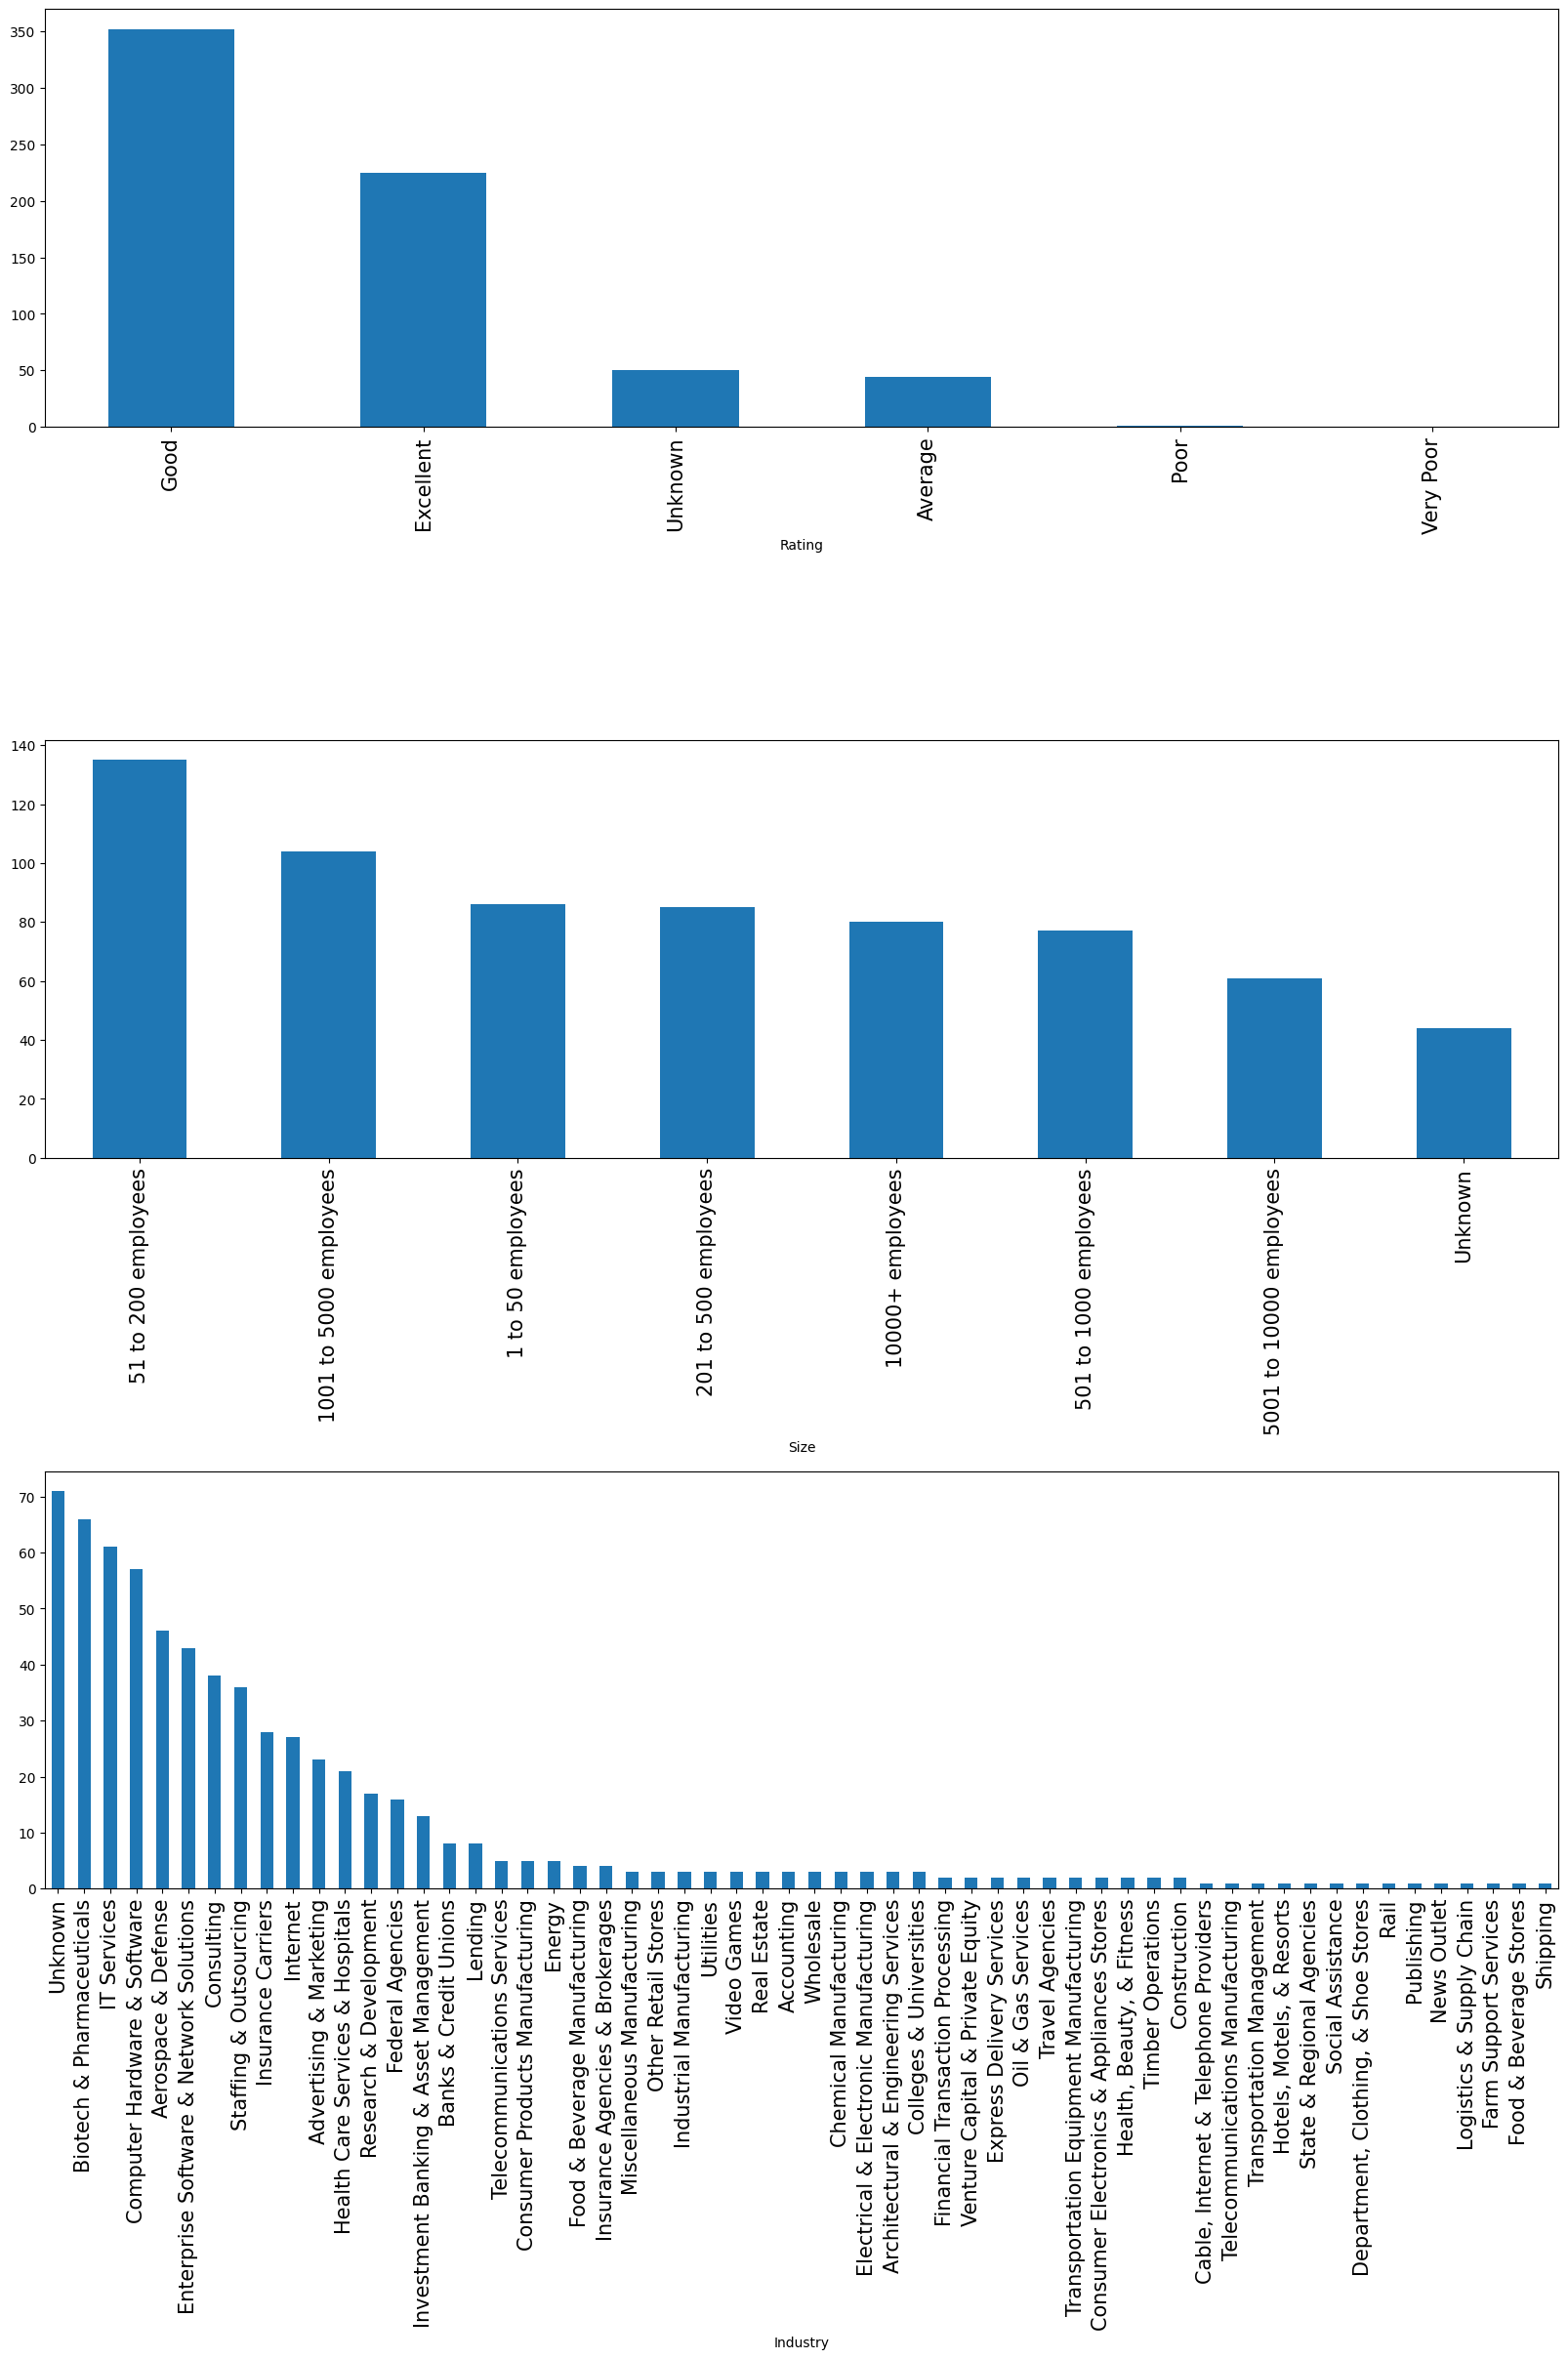

In [18]:
# Shows the number of each value in the the categorical labels.
# 1. From the data on the Rating it show that most of the positions are good and excellent.  Remember the data is a sample.
#    My main question is if the saqmple data is skewed towards Good or Excellent.
# 2. Size of company -- The idea that came to mind was balancing.  Each Answer could have about sixty rows of data to test a machine learning algorithm
# 3. Show the counts of the industry.
fig, ax = plt.subplots(3, 1, figsize=(20, 25))
ravel_ax = np.ravel(ax)

# Adjust the vertical space between subplots (increase or decrease as needed)
fig.subplots_adjust(hspace=0.75)

for index, column in enumerate(categories.columns):
    ravel_ax[index].tick_params(axis='x', labelsize=15)
    categories[column].value_counts().plot(kind='bar', ax=ravel_ax[index])

plt.show()

The number of missing values is  -118


<Axes: >

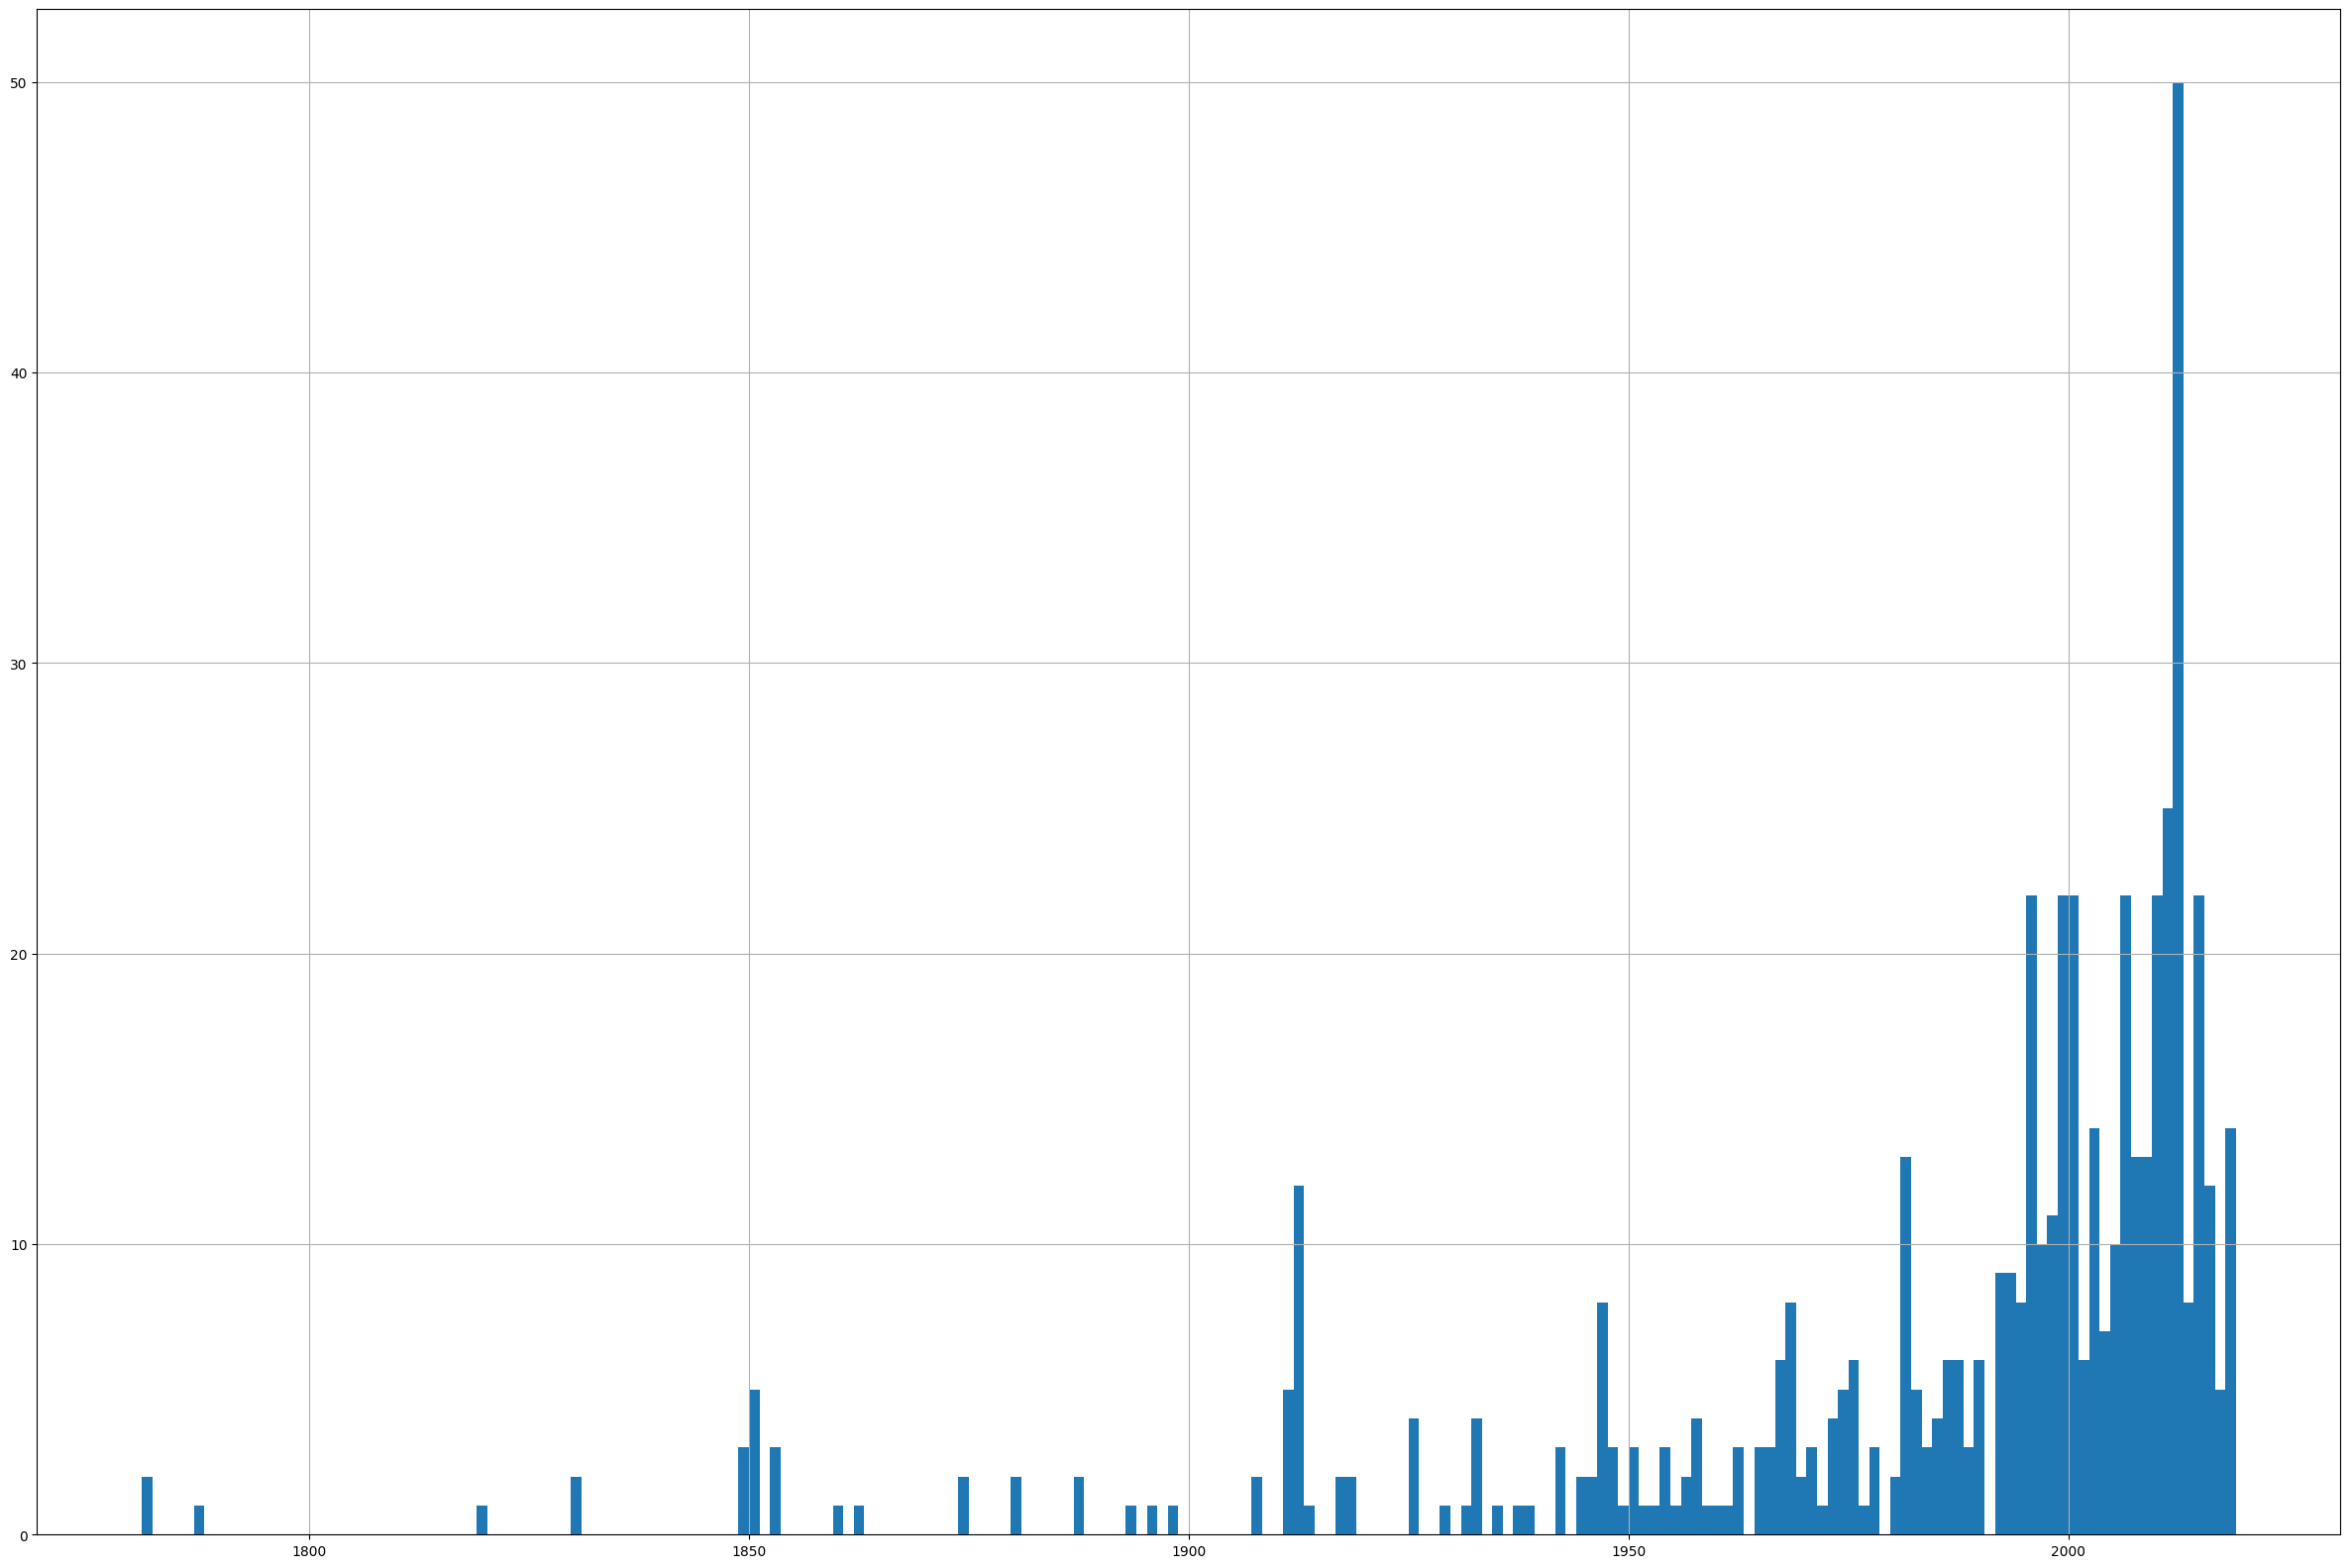

In [19]:
# Shows the companies createf each year.  Even with this initital graph we can see that some companies were created in the 1700s 
# and 1800.  Dependeing on the question we were solving it might be a good to research why those compainies are long lasting.
tableWithUnknown=integers['Founded'].copy(deep=True)
print("The number of missing values is ", integers['Founded'][integers['Founded'] == -1].sum())
integers['Founded'][integers['Founded'] != -1].hist(bins=200, figsize=(30,20))


<Axes: >

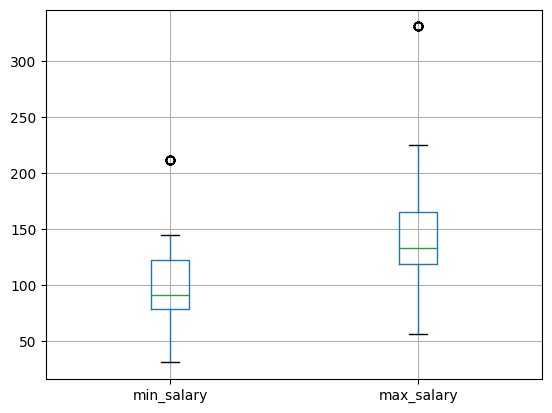

In [20]:
# Do a box plot on the min and max of the salary.  I want to look at the overlap to get an idea of how different the min and max 
# salaries are:  The main surprise was the overlap of min and max salaries.
integers[['min_salary', 'max_salary']].boxplot()